In [570]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [571]:
file_path = os.path.join('D:\Code for tutorials\Machine Learning\datasets\supervised Learnings\classification\KNN\Chapter 2 - housing.csv')

<>:1: SyntaxWarning: invalid escape sequence '\C'
<>:1: SyntaxWarning: invalid escape sequence '\C'
C:\Users\DHUSNIC INFANT DM\AppData\Local\Temp\ipykernel_19180\3999438826.py:1: SyntaxWarning: invalid escape sequence '\C'
  file_path = os.path.join('D:\Code for tutorials\Machine Learning\datasets\supervised Learnings\classification\KNN\Chapter 2 - housing.csv')


In [572]:

housing_data = pd.read_csv(file_path)
# print(f"houseing_data.head():\n{housing_data.head()}")
print(f"housing_data.info():\n{housing_data.info()}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
housing_data.info():
None


<Axes: ylabel='ocean_proximity'>

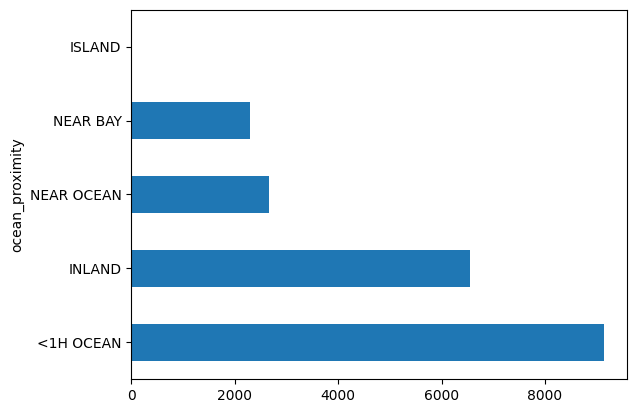

In [573]:
housing_data['ocean_proximity'].value_counts().plot(kind='barh')

In [574]:
housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<Axes: >

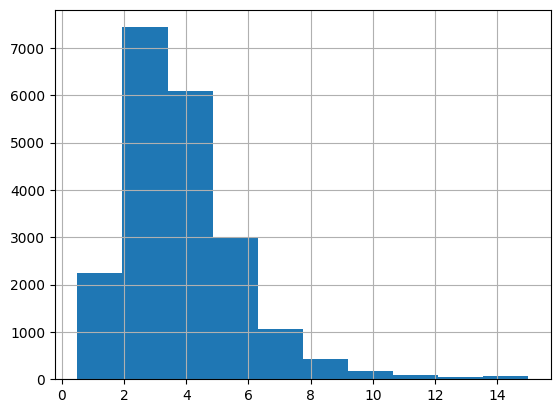

In [575]:
housing_data['median_income'].hist()

In [576]:
housing_data['income_cat'] = pd.cut(housing_data['median_income'],
                                    bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                                    labels=[1, 2, 3, 4, 5])

housing_data['income_cat'].value_counts()

income_cat
3    7236
2    6581
4    3639
5    2362
1     822
Name: count, dtype: int64

<Axes: >

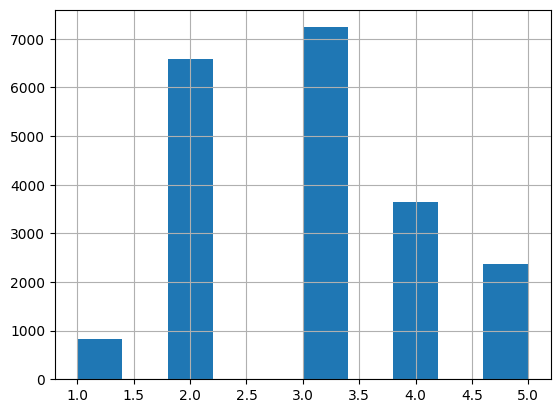

In [577]:
housing_data['income_cat'].hist()

In [578]:
y=housing_data['median_house_value']
X=housing_data.drop('median_house_value',axis=1)



### Split Dataset

In [579]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")


X_train: (16512, 10)
X_test: (4128, 10)


<Axes: >

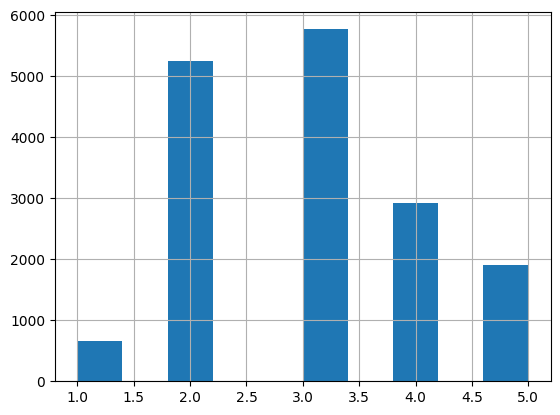

In [580]:
X_train['income_cat'].hist()

### Stratisfied Split

In [581]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing_data, housing_data["income_cat"]):
    strat_train_set = housing_data.loc[train_index]
    strat_test_set = housing_data.loc[test_index]
    
print(strat_train_set.shape) 
print(strat_test_set.shape)

(16512, 11)
(4128, 11)


In [582]:
strat_test_set['income_cat'].value_counts()/len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [583]:
housing_data['income_cat'].value_counts()/len(housing_data)

income_cat
3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: count, dtype: float64

In [584]:
housing_data['income_cat']

0        5
1        5
2        5
3        4
4        3
        ..
20635    2
20636    2
20637    2
20638    2
20639    2
Name: income_cat, Length: 20640, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

In [585]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)
train_set, test_set = train_test_split(housing_data, test_size=0.2, random_state=42)
compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing_data),
    "Stratified": income_cat_proportions(strat_train_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [586]:
# print(strat_train_set)
strat_train_set.drop("income_cat", axis="columns", inplace=True)
# print(strat_train_set)
strat_test_set.drop("income_cat", axis="columns", inplace=True)

### Visualizing the data

In [587]:
import matplotlib.pyplot as plt

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

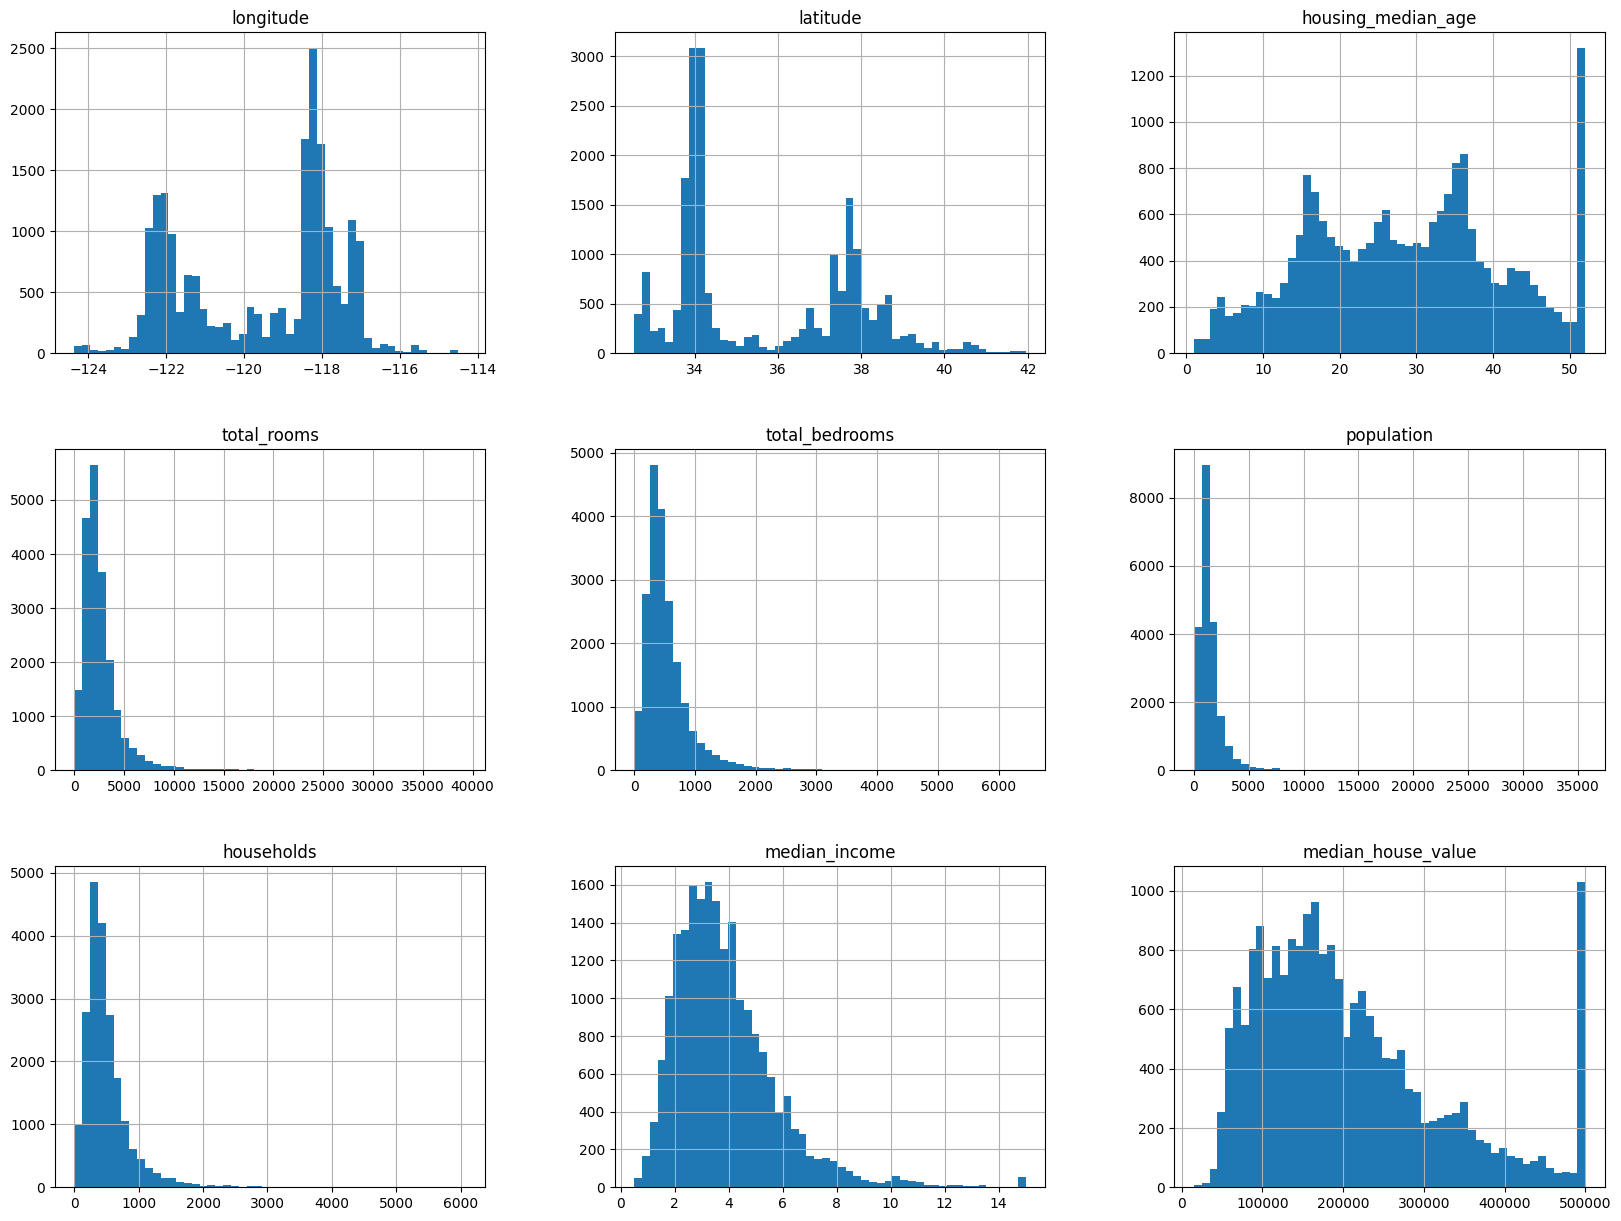

In [588]:
housing_data.hist(bins=50, figsize=(20,15))

<Axes: >

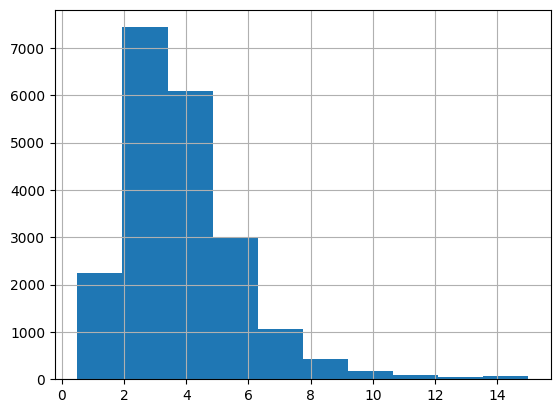

In [589]:
housing_data['median_income'].hist()

### Geographic Data

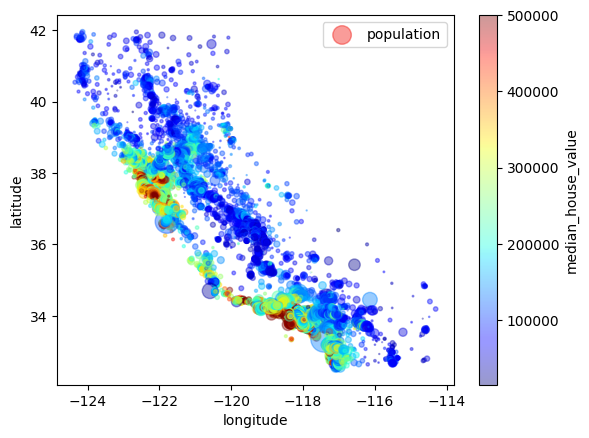

In [590]:
housing_data.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
                  s=housing_data['population']/100, label='population',
                  c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True,
                  sharex=False)

plt.show()

### Correlation Matrices

In [591]:
housing_data.head()
housing_data.drop('ocean_proximity',axis=1,inplace=True)
housing_data.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_cat
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967,-0.010690
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160,-0.085528
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623,-0.146920
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153,0.220528
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,0.015662
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650,0.025809
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843,0.038490
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075,0.902750
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000,0.643892
income_cat,-0.010690,-0.085528,-0.146920,0.220528,0.015662,0.025809,0.038490,0.902750,0.643892,1.000000


<Axes: >

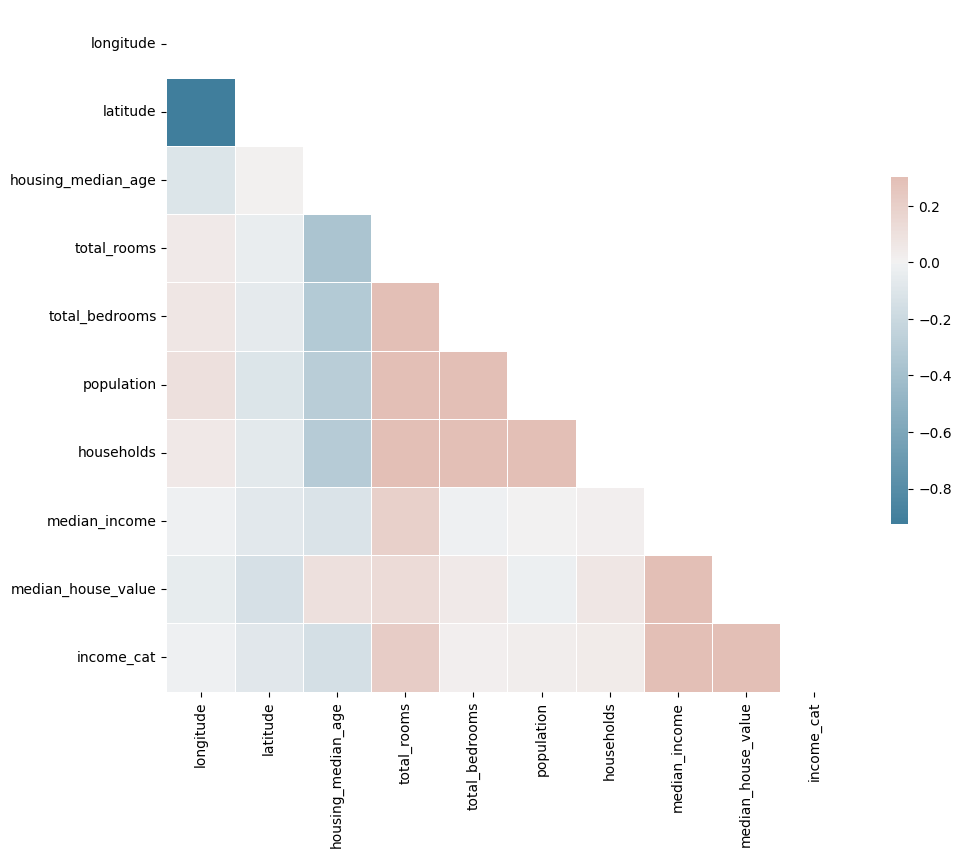

In [592]:
import seaborn as sns
corr = housing_data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Preparing the data for the model

In [593]:
housing_data = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

#### Dealing with missing values

In [594]:
sample_incomplete_rows = housing_data[housing_data.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,NaN,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,NaN,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,NaN,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,NaN,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,NaN,1145.0,480.0,6.3580,NEAR OCEAN


In [595]:
### Get Rid of rows with missing values in the "total_bedrooms" column
sample_incomplete_rows.dropna(subset=["total_bedrooms"])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


In [596]:
### Get Rid of columns which have missing values
sample_incomplete_rows.drop("total_bedrooms",axis=1)

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,1145.0,480.0,6.3580,NEAR OCEAN


In [597]:
### insert the median value of the column with missing values
median = housing_data['total_bedrooms'].median()
sample_incomplete_rows.fillna(median, inplace=True)

In [598]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [599]:
housing_num = housing_data.select_dtypes(include=[np.number])
housing_num

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964
...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964


In [600]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [601]:
x = imputer.fit_transform(housing_num)
housing_tr = pd.DataFrame(x, columns=housing_num.columns, index=housing_num.index)
print(housing_tr.columns)
print(housing_tr.index)
print(housing_tr.head())

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')
Index([12655, 15502,  2908, 14053, 20496,  1481, 18125,  5830, 17989,  4861,
       ...
       12396, 16476,  2271,  6980,  5206, 15174, 12661, 19263, 19140, 19773],
      dtype='int64', length=16512)
       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
12655    -121.46     38.52                29.0       3873.0           797.0   
15502    -117.23     33.09                 7.0       5320.0           855.0   
2908     -119.04     35.37                44.0       1618.0           310.0   
14053    -117.13     32.75                24.0       1877.0           519.0   
20496    -118.70     34.28                27.0       3536.0           646.0   

       population  households  median_income  
12655      2237.0       706.0         2.1736  
15502      2015.0       768.0         6.3373  
2908        667.0    

In [602]:
imputer.strategy

'median'

In [603]:
### Encode the categorical (Features or Variables)
housing_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,<1H OCEAN
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,INLAND
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,<1H OCEAN
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,<1H OCEAN


In [604]:
housing_cat = housing_data[['ocean_proximity']]
housing_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [605]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [606]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 16512 stored elements and shape (16512, 5)>

### Feature Engineering

In [607]:
def feature_engineering(data):
    data['rooms_per_household'] = data['total_rooms'] / data['households']
    data['bedrooms_per_room'] = data['total_bedrooms'] / data['total_rooms']
    data['population_per_household'] = data['population'] / data['households']
    return data

In [608]:
housing_feature_engineered = feature_engineering(housing_num)
housing_feature_engineered.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,5.485836,0.205784,3.168555
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,6.927083,0.160714,2.623698
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,5.393333,0.191595,2.223333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,3.886128,0.276505,1.859213
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,6.096552,0.182692,3.167241


### Scaling Our Data

In [609]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
housing_scaled = scaler.fit_transform(housing_feature_engineered)
housing_scaled

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.01739526,
        -0.12355538,  0.00622264],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.56925554,
        -0.9090609 , -0.04081077],
       [ 0.26758118, -0.1259716 ,  1.22045984, ..., -0.01802432,
        -0.37085412, -0.07537122],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ..., -0.5092404 ,
         0.38207698, -0.03743619],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.32814891,
        -0.50609094, -0.05915604],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.01407228,
        -0.12421016,  0.00657083]], shape=(16512, 11))

In [610]:
housing = strat_train_set.drop("median_house_value", axis=1)

housing_labels = strat_train_set["median_house_value"].copy()

def data_transformations(data):

    ### Separate Labels if they Exist ###

    if "median_house_value" in data.columns:
        labels = data["median_house_value"]
        data = data.drop("median_house_value", axis=1)
        
    else:
        labels = None

    ### Feature Engineering ###
    feature_engineered_data = feature_engineering(data)
    features = list(feature_engineered_data.columns) # Creating a list of our features for future use

    ### Imputing Data ###
    from sklearn.impute import SimpleImputer
    imputer = SimpleImputer(strategy="median")

    housing_num = feature_engineered_data.select_dtypes(include=[np.number])
    imputed = imputer.fit_transform(housing_num)

    ### Encoding Categorical Data ###
    housing_cat = feature_engineered_data.select_dtypes(exclude=[np.number])

    from sklearn.preprocessing import OneHotEncoder
    cat_encoder = OneHotEncoder(sparse_output=False)
    housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
    features = features + cat_encoder.categories_[0].tolist()
    features.remove("ocean_proximity") # We're encoding this variable, so we don't need it in our list anymore


    ### Scaling Numerical Data ###
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()

    housing_scaled = scaler.fit_transform(imputed)

    ### Concatening all Data ###
    output = np.hstack([housing_scaled, housing_cat_1hot])

    return output, labels, features

In [611]:
test_data,test_labels,features=data_transformations(strat_test_set)
test_data

array([[ 0.57507019, -0.69657252,  0.0329564 , ...,  0.        ,
         0.        ,  0.        ],
       [-0.43480141, -0.33466769, -0.36298077, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.54522177, -0.63547171,  0.58726843, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.08656982, -0.54617051,  1.14158047, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.81385757, -0.92687559,  0.11214383, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.49049967, -0.66367208,  0.58726843, ...,  0.        ,
         0.        ,  0.        ]], shape=(4128, 16))

### Linear Regression

In [612]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(test_data, test_labels)

LinearRegression()

In [613]:
orginal_values = test_labels[:5]
predicted_values = lin_reg.predict(test_data[:5])

comparing_dataframe = pd.DataFrame(
    data={
        "original_values": orginal_values,
        "predicted_values": predicted_values,
    }
)

comparing_dataframe["Diffrences"] = comparing_dataframe["original_values"] - comparing_dataframe["predicted_values"]

comparing_dataframe

,original_values,predicted_values,Diffrences
5241,500001.0,422365.438265,77635.561735
17352,162500.0,288256.205104,-125756.205104
3505,204600.0,239117.862048,-34517.862048
7777,159700.0,188162.190153,-28462.190153
14155,184000.0,262218.628801,-78218.628801


In [614]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(orginal_values, predicted_values)
print(lin_mae)

68918.08956833195


In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=2)
tree_reg.fit(test_data, test_labels)